In [1]:
# Dependencies
import matplotlib.pyplot as plt
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import (
    VGG19, 
    preprocess_input, 
    decode_predictions
)

In [2]:
# Load the VGG19 model
# https://keras.io/applications/#VGG19
model = VGG19(include_top=True, weights='imagenet')

In [3]:
# Define default image size for VGG19
image_size = (224, 224)

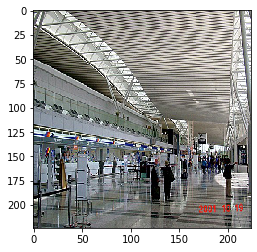

In [4]:
# Load the image and resize to default image size
image_path = os.path.join("Images", "airport_inside", "airport_inside_0001.jpg")
img = image.load_img(image_path, target_size=image_size)
plt.imshow(img)

In [5]:
# Preprocess image for model prediction
# This step handles scaling and normalization for VGG19
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [6]:
# Make predictions
predictions = model.predict(x)
print('Predicted:', decode_predictions(predictions, top=3))

40960/35363 [==================================] - 0s 0us/step
Predicted: [[('n02966193', 'carousel', 0.63152003), ('n04501370', 'turnstile', 0.07956972), ('n04204347', 'shopping_cart', 0.040435113)]]


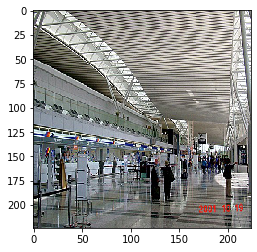

In [7]:
plt.imshow(img)

In [8]:
# Refactor above steps into reusable function
def predict(image_path):
    """Use VGG19 to label image"""
    img = image.load_img(image_path, target_size=image_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    predictions = model.predict(x)
    plt.imshow(img)
    print('Predicted:', decode_predictions(predictions, top=3))

Predicted: [[('n02966193', 'carousel', 0.63152003), ('n04501370', 'turnstile', 0.07956972), ('n04204347', 'shopping_cart', 0.040435113)]]


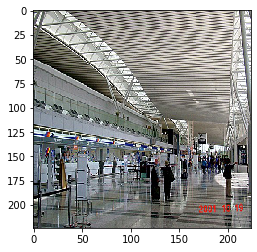

In [9]:
image_path = os.path.join("Images", "airport_inside", "airport_inside_0001.jpg")
predict(image_path)